In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('customer_shopping_data.csv')
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [6]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [ ]:
col=['age','category','payment_method','shopping_mall']
for i in col:
    df[i]=df[i].astype('category')

invoice_no          object
customer_id         object
gender              object
age               category
category          category
quantity             int64
price              float64
payment_method    category
invoice_date        object
shopping_mall     category
dtype: object

In [11]:
df['invoice_date']=pd.to_datetime(df['invoice_date'],dayfirst=True)

In [12]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                     category
category                category
quantity                   int64
price                    float64
payment_method          category
invoice_date      datetime64[ns]
shopping_mall           category
dtype: object

In [13]:
df.duplicated().sum()

0

In [14]:
df['Total Sale']=df['price']*df['quantity']

In [18]:
sales_by_category = df.groupby('category')[['Total Sale', 'quantity']].sum().reset_index()
sales_by_category

C:\Users\jadha\AppData\Local\Temp\ipykernel_2164\3028311709.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category = df.groupby('category')[['Total Sale', 'quantity']].sum().reset_index()


,category,Total Sale,quantity
0,Books,8.345529e+05,14982
1,Clothing,1.139968e+08,103558
2,Cosmetics,6.792863e+06,45465
3,Food & Beverage,8.495351e+05,44277
4,Shoes,6.655345e+07,30217
5,Souvenir,6.358247e+05,14871
6,Technology,5.786235e+07,15021
7,Toys,3.980426e+06,30321


In [21]:
sales_by_payment=df.groupby('payment_method')[['Total Sale', 'quantity']].sum().reset_index()
sales_by_payment

C:\Users\jadha\AppData\Local\Temp\ipykernel_2164\1983187733.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_payment=df.groupby('payment_method')[['Total Sale', 'quantity']].sum().reset_index()


,payment_method,Total Sale,quantity
0,Cash,1.128322e+08,133370
1,Credit Card,8.807712e+07,105045
2,Debit Card,5.059643e+07,60297


In [22]:
sales_by_region=df.groupby('shopping_mall')[['Total Sale', 'quantity']].sum().reset_index()
sales_by_region

C:\Users\jadha\AppData\Local\Temp\ipykernel_2164\1624043498.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_region=df.groupby('shopping_mall')[['Total Sale', 'quantity']].sum().reset_index()


,shopping_mall,Total Sale,quantity
0,Cevahir AVM,12645138.20,14949
1,Emaar Square Mall,12406100.29,14501
2,Forum Istanbul,12303921.24,14852
3,Istinye Park,24618827.68,29465
4,Kanyon,50554231.10,59457
5,Mall of Istanbul,50872481.68,60114
6,Metrocity,37302787.33,44894
7,Metropol AVM,25379913.19,30530
8,Viaport Outlet,12521339.72,14716
9,Zorlu Center,12901053.82,15234


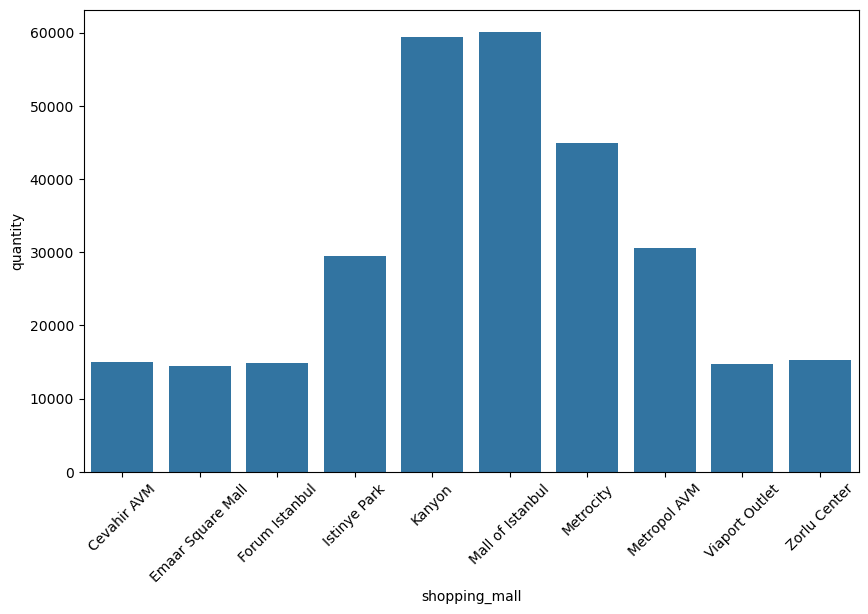

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='shopping_mall',y='quantity',data=sales_by_region)
plt.xticks(rotation=45)
plt.show()

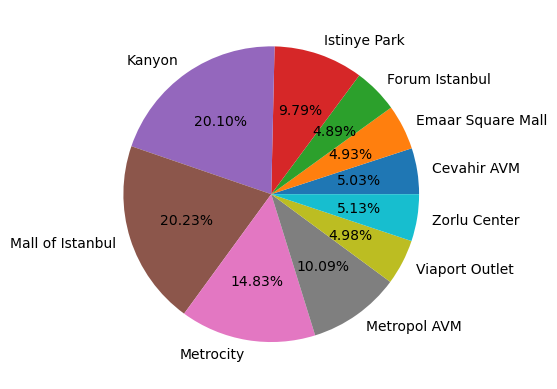

In [34]:
plt.pie(sales_by_region['Total Sale'],labels=sales_by_region['shopping_mall'],autopct='%0.2f%%')
plt.show()

In [35]:
sale_cat_region=df.groupby(['shopping_mall', 'category'])['Total Sale'].sum().reset_index()
sale_cat_region

C:\Users\jadha\AppData\Local\Temp\ipykernel_2164\2325165104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sale_cat_region=df.groupby(['shopping_mall', 'category'])['Total Sale'].sum().reset_index()


,shopping_mall,category,Total Sale
0,Cevahir AVM,Books,44541.00
1,Cevahir AVM,Clothing,5706321.28
2,Cevahir AVM,Cosmetics,321214.00
3,Cevahir AVM,Food & Beverage,44010.45
4,Cevahir AVM,Shoes,3243918.85
...,...,...,...
75,Zorlu Center,Food & Beverage,41955.06
76,Zorlu Center,Shoes,3535601.47
77,Zorlu Center,Souvenir,28996.56
78,Zorlu Center,Technology,2987250.00
